# 0. 사용할 패키지 불러오기

In [43]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.keras.models import load_model

# 1. 데이터 불러오기

In [44]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2570501045140657975
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17100414550947858036
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7554842624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1371912965084248098
physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6732958925
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14256344624910917709
physical_device_desc: "device: 1, name: GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7889936604465062004
physical_device_desc: "device: XLA_GPU device"
]


In [45]:
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split

x_train = np.empty((0, 320, 320, 3))
y_train = np.empty((0, 3))
print(y_train.shape)

training_data = glob.glob('/home/pirl/Documents/final_motion_npz_22/*.npz')
#print(training_data)
idx=1
for single_npz in training_data:
    with np.load(single_npz) as data:
        #print(data.files)
        x = data['train']
        y = data['training_labels']
        print(x.shape)
    x = np.reshape(x, (-1, 320, 320, 3))
    
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y))
    #print(idx)
    idx+=1
print(x_train.shape)
# train test split, 7:3
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)

y_train = y_train[:,:]
y_test = y_test[:,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(0, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320, 320, 3)
(1, 320

KeyboardInterrupt: 

# 데이터 확인

In [ ]:
#import pandas as pd

#y_data = pd.DataFrame(y_total[:, :])

In [ ]:
#y_data.count()

In [ ]:
#left = y_data.loc[y_data[:][0] == 1]

In [ ]:
#left.count()

In [ ]:
#right = y_data.loc[y_data[:][1] == 1]

In [ ]:
#right.count()

In [ ]:
#forward = y_data.loc[y_data[:][2] == 1]

In [ ]:
#forward.count()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

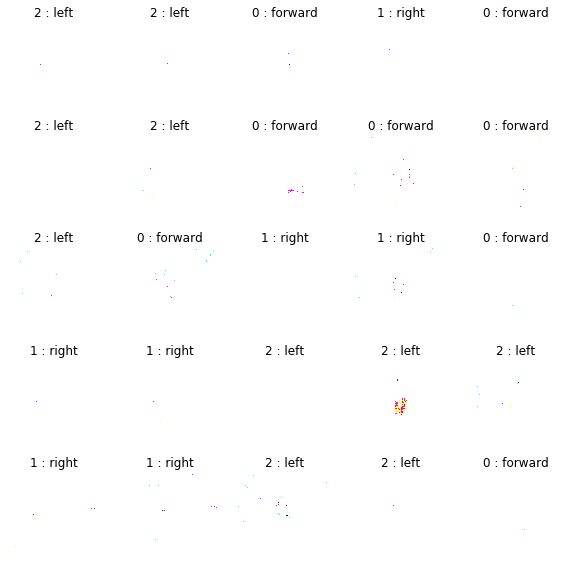

In [7]:
# 데이터 확인

from matplotlib import pyplot as plt
%matplotlib inline

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(320, 320,3))
    
    label = np.argmax(y_train[i])
                      
    if label == 2 :
        direction = 'left'
    elif label == 1:
        direction = 'right'
    elif label == 0:
        direction = 'forward'
#     elif label == 3:
#         direction = 'backward'
                      
    sub_plt_title = str(label) + " : " + direction
    sub_plt.set_title(sub_plt_title)

plt.show()

# 3. 모델 생성

In [18]:
# image size = 160 x 320
def posla_net():
    
    # model setting
    H = 320
    W = 320
    CH = 3

    inputShape = (H, W, CH)

    activation = 'relu'
    keep_prob_conv = 0.25
    keep_prob_dense = 0.5

    #init = 'glorot_normal'
    #init = 'he_normal'
    init = 'he_uniform'
    chanDim = -1
    classes = 3
    
    model = Sequential()
    
    # CONV => RELU => POOL
    model.add(Conv2D(3, (3, 3), padding="valid", input_shape=inputShape, kernel_initializer=init, activation=activation))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(9, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(18, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(80, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    model.add(Dense(15, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    # softmax classifier
    model.add(Dense(classes , activation = 'softmax'))
    
    return model

In [19]:
model = posla_net()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 318, 318, 3)       84        
_________________________________________________________________
batch_normalization_1 (Batch (None, 318, 318, 3)       12        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 159, 159, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 157, 157, 9)       252       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 78, 78, 9)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 76, 76, 18)        1476      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 18)        0         
__________

In [20]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file= 'video_net_plot.png', show_shapes = True, show_layer_names = True)

# 4. 모델 파라미터 셋팅

적은 수의 이미지 데이터가 존재할 경우 데이터를 늘리는 용도로 사용

In [21]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [24]:
# initialize the model
# EPOCHS = 50
# INIT_LR = 1e-3
# BS = 32
# split_ratio = 0.2

In [25]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
 

[INFO] compiling model...


# 5. 모델 훈련

In [26]:
from tensorflow.keras.utils import to_categorical


In [27]:
y_binary = to_categorical(y_train)

In [29]:

hist = model.fit(x_train, y_train, 
                 epochs=EPOCHS, batch_size=BS, 
                 validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Train on 57 samples, validate on 15 samples
Epoch 1/50
57/57 [==============================] - 12s 217ms/step - loss: 4.5065 - acc: 0.4386 - val_loss: 13.8975 - val_acc: 0.1333
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 5.1917 - acc: 0.3333 - val_loss: 13.2504 - val_acc: 0.1333
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 3.8670 - acc: 0.3684 - val_loss: 12.3775 - val_acc: 0.1333
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 3.4400 - acc: 0.3860 - val_loss: 9.2599 - val_acc: 0.2000
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 3.4434 - acc: 0.3158 - val_loss: 4.7132 - val_acc: 0.4000
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 2.3971 - acc: 0.3684 - val_loss: 2.6374 - val_acc: 0.6667
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 2.1599 - acc: 0.4035 - val_loss: 2.0013 - val_acc: 0.6667
Epoch 8/50
57/57 [======================

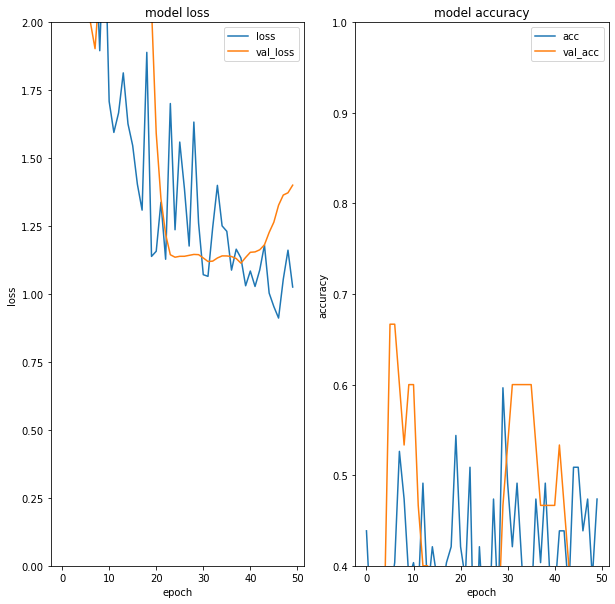

In [30]:
plt.subplot(1, 2, 1)
plt.title('model loss')
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0,2))

plt.subplot(1, 2, 2)
plt.title('model accuracy')
plt.plot(hist.history['acc'], label="acc")
plt.plot(hist.history['val_acc'], label="val_acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0.4, 1))


plt.show();

# 6. 모델 결과 확인

In [31]:
#l_model = load_model('./model_data/VGG_model.h5')

In [32]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

138/138 [==============================] - 1s 6ms/step
## evaluation loss and_metrics ##
[1.026841402053833, 0.5]


In [33]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

True : 0, Predict : 2
True : 1, Predict : 2
True : 2, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 2
True : 1, Predict : 0
True : 0, Predict : 2


# 7. 최종 모델 훈련

In [34]:
x_total = np.vstack((x_train, x_test))
y_total = np.vstack((y_train, y_test))

print(x_total.shape)
print(y_total.shape)

(210, 320, 320, 3)
(210, 3)


In [35]:
early_stopping = EarlyStopping(monitor='loss', patience=10)

In [36]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [37]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [38]:
hist = model.fit(x_total, y_total, 
                 epochs=EPOCHS, batch_size=BS, 
                 #validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Epoch 1/50
210/210 [==============================] - 3s 14ms/step - loss: 1.2879 - acc: 0.3524
Epoch 2/50
210/210 [==============================] - 1s 4ms/step - loss: 1.1754 - acc: 0.4333
Epoch 3/50
210/210 [==============================] - 1s 4ms/step - loss: 1.0065 - acc: 0.5000
Epoch 4/50
210/210 [==============================] - 1s 4ms/step - loss: 1.1085 - acc: 0.4476
Epoch 5/50
210/210 [==============================] - 1s 4ms/step - loss: 0.9772 - acc: 0.4810
Epoch 6/50
210/210 [==============================] - 1s 4ms/step - loss: 0.9540 - acc: 0.5667
Epoch 7/50
210/210 [==============================] - 1s 4ms/step - loss: 1.0606 - acc: 0.4524
Epoch 8/50
210/210 [==============================] - 1s 4ms/step - loss: 0.9319 - acc: 0.5190
Epoch 9/50
210/210 [==============================] - 1s 4ms/step - loss: 0.9413 - acc: 0.5286
Epoch 10/50
210/210 [==============================] - 1s 4ms/step - loss: 0.9686 - acc: 0.5143
Epoch 11/50
210/210 [===========================

In [39]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

138/138 [==============================] - 1s 5ms/step
## evaluation loss and_metrics ##
[0.39110952615737915, 0.9202898740768433]


In [40]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1


# 8. 모델 저장

In [42]:
from tensorflow.python.keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open("motion_model_demoV0.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("motion_model_demoV0.h5")
print("Saved model to disk")

Saved model to disk
